1.Evaluate the CDF of Cauchy distribution F(x) = P(C < x) using the method of
Important Sampling and other Variance Reduction Methods (at least two different methods). Consider x = −6, −5, −4, −3.5, −3, −2.5, −2.

本題可以改看成$P(C > -x)$，作法就會變得跟老師上課ppt一樣了。

In [ ]:
# importance sampling
IS = function(c, n = 1000, N = 10000){
    f = function(x){return (1 / (c * pi * (1 + x^(-2))))}
    
    theta = NULL
    for (i in 1:n){
        U = runif(N)
        x = c / U
        theta = c(theta, mean(f(x)))
    }
    mean = mean(theta)
    var = var(theta)
    return (list(c = c, Mean = mean, Var = var))
}

print(IS(2))
cat("\n")
print(IS(2.5))
cat("\n")
print(IS(3))
cat("\n")
print(IS(3.5))
cat("\n")
print(IS(4))
cat("\n")
print(IS(5))
cat("\n")
print(IS(6))
cat("\n")

$c
[1] 2

$Mean
[1] 0.1475874

$Var
[1] 9.133706e-09


$c
[1] 2.5

$Mean
[1] 0.1211166

$Var
[1] 2.937493e-09


$c
[1] 3

$Mean
[1] 0.1024172

$Var
[1] 1.057605e-09


$c
[1] 3.5

$Mean
[1] 0.08858612

$Var
[1] 4.533623e-10


$c
[1] 4

$Mean
[1] 0.0779794

$Var
[1] 1.839889e-10


$c
[1] 5

$Mean
[1] 0.06283323

$Var
[1] 5.139115e-11


$c
[1] 6

$Mean
[1] 0.05256857

$Var
[1] 1.658931e-11




In [ ]:
# Antithetic
antithetic = function(c, N = 10000, n = 1000){
    cauchypdf = function(x){return (c / (pi * (1 + x^2)))}
    AN = NULL
    for (i in 1:n){
        u = runif(N / 2, 0, c)
        w = c - u
        t1 = cauchypdf(u)
        t2 = cauchypdf(w)
        AN = c(AN, 0.5 - (mean(t1) + mean(t2)) / 2)
    }
    AN_Mean = mean(AN)
    AN_Var = var(AN)
    return (list(c = c, Mean = AN_Mean, Var = AN_Var))
}

print(antithetic(c = 2))
cat("\n")
print(antithetic(c = 2.5))
cat("\n")
print(antithetic(c = 3))
cat("\n")
print(antithetic(c = 3.5))
cat("\n")
print(antithetic(c = 4))
cat("\n")
print(antithetic(c = 5))
cat("\n")
print(antithetic(c = 6))
cat("\n")

$c
[1] 2

$Mean
[1] 0.1475766

$Var
[1] 1.089973e-07


$c
[1] 2.5

$Mean
[1] 0.1211178

$Var
[1] 5.341808e-07


$c
[1] 3

$Mean
[1] 0.1024257

$Var
[1] 1.402749e-06


$c
[1] 3.5

$Mean
[1] 0.08855374

$Var
[1] 2.780006e-06


$c
[1] 4

$Mean
[1] 0.07799776

$Var
[1] 4.151017e-06


$c
[1] 5

$Mean
[1] 0.0628417

$Var
[1] 8.426355e-06


$c
[1] 6

$Mean
[1] 0.05261762

$Var
[1] 1.369284e-05




2.Let $X_i, \,\, i = 1, 2, ..., 5$ be random variables, following the exponential distribution 5
with mean 1. Consider the quantity $\theta$ defined by $\theta = P\{\sum^5_{i=1}iX_i \geq 21.6\}$. Propose at least three simulation methods to estimate $\theta$ and compare their variances.

In [ ]:
func = function(x){
    (125/24) * exp((-1/5) * x) - 
    (32/3) * exp((-1/4) * x) + 
    (27/4) * exp((-1/3) * x) + 
    (1/24) * exp((-1) * x)+
    (-4/3) * exp((-1/2) * x)
}

In [ ]:
# Monte Carlo
theta = NULL
for (i in 1:1000){
    x = runif(1000, 0, 21.6)
    theta = c(theta, 1 - mean(func(x) * 21.6))
}
print(mean(theta))
print(var(theta))

[1] 0.1681999
[1] 0.0001927073


In [ ]:
# Hit or Miss
theta = NULL
for (i in 1:1000){
    ls = NULL
    for (j in 1:1000){
        rn = rexp(5)
        ls = c(ls, sum(rn * c(1:5)))
    }
    theta = c(theta, sum(ls >= 21.6)/1000)
}
print(mean(theta))
print(var(theta))

[1] 0.168803
[1] 0.0001331333


In [ ]:
# stratified 
theta = NULL
for (i in 1:1000){
    ls = NULL
    for (j in 1:10){
        x = runif(1000/10, 21.6 * (j - 1) / 10, 21.6 * j / 10)
        ls = c(ls, func(x) * 21.6)
    }
    theta = c(theta, 1 - mean(ls))
}
print(mean(theta))
print(var(theta))

[1] 0.1686052
[1] 4.92253e-06


3.Let $(X, Y)$ be a bivariate random variable following normal distribution, with mean $(\mu_x, \mu_y)$ and variance matrix 
$
\begin{pmatrix}
    \sigma_x^2 & \rho\sigma_x\sigma_y\\
    \rho\sigma_x\sigma_y & \sigma_y^2
\end{pmatrix}
$.
Using Monte Carlo simulation to estimate the probability of $P(X + Y < k)$, where $k = 0, 1, 2, 3, 4$, $\mu_x=\mu_y=0=\rho$, and $\sigma_x=\sigma_y=1$. In addition, propose at least three variance methods and compare their results with those using Monte Carlo simulation. Also, redo the preceding simulation if the correlation coefficient is −0.9, −0.5, 0.3, or 0.7.

In [ ]:
BN_HM = function(n, k, mu1, mu2, sigma1, sigma2, rho){
    rx = NULL; ry = NULL
    for (i in 1:n){
        y = mu2 + sigma2 * rnorm(1, 0, 1)
        z = rnorm(1, 0, 1)
        x = mu1 + rho * (sigma1 / sigma2) * (y - mu2) + sqrt((1 - rho^2) * sigma1^2) * z
        rx = c(rx, x); ry = c(ry, y)
    }
    result = sum((rx + ry) < k) / n
    return (result)
}

SimuBNHM = function(m, n, k, mu1, mu2, sigma1, sigma2, rho){
    l = NULL
    for (i in 1:m){
    x = BN_MC(n, k, mu1, mu2, sigma1, sigma2, rho)
    l = c(l, x)
    }
    
    m = mean(l)
    v = var(l)
    return (list(p = m, variance = v))
}

In [ ]:
# rho = -0.9
print(SimuBNHM(1000, 1000, 0, 0, 0, 1, 1, -0.9))
print(SimuBNHM(1000, 1000, 1, 0, 0, 1, 1, -0.9))
print(SimuBNHM(1000, 1000, 2, 0, 0, 1, 1, -0.9))
print(SimuBNHM(1000, 1000, 3, 0, 0, 1, 1, -0.9))
print(SimuBNHM(1000, 1000, 4, 0, 0, 1, 1, -0.9))
cat("=========================================\n")
# rho = -0.5
print(SimuBNHM(1000, 1000, 0, 0, 0, 1, 1, -0.5))
print(SimuBNHM(1000, 1000, 1, 0, 0, 1, 1, -0.5))
print(SimuBNHM(1000, 1000, 2, 0, 0, 1, 1, -0.5))
print(SimuBNHM(1000, 1000, 3, 0, 0, 1, 1, -0.5))
print(SimuBNHM(1000, 1000, 4, 0, 0, 1, 1, -0.5))
cat("=========================================\n")
# rho = 0
print(SimuBNHM(1000, 1000, 0, 0, 0, 1, 1, 0))
print(SimuBNHM(1000, 1000, 1, 0, 0, 1, 1, 0))
print(SimuBNHM(1000, 1000, 2, 0, 0, 1, 1, 0))
print(SimuBNHM(1000, 1000, 3, 0, 0, 1, 1, 0))
print(SimuBNHM(1000, 1000, 4, 0, 0, 1, 1, 0))
cat("=========================================\n")
# rho = 0.3
print(SimuBNHM(1000, 1000, 0, 0, 0, 1, 1, 0.3))
print(SimuBNHM(1000, 1000, 1, 0, 0, 1, 1, 0.3))
print(SimuBNHM(1000, 1000, 2, 0, 0, 1, 1, 0.3))
print(SimuBNHM(1000, 1000, 3, 0, 0, 1, 1, 0.3))
print(SimuBNHM(1000, 1000, 4, 0, 0, 1, 1, 0.3))
cat("=========================================\n")
# rho = 0.7
print(SimuBNHM(1000, 1000, 0, 0, 0, 1, 1, 0.7))
print(SimuBNHM(1000, 1000, 1, 0, 0, 1, 1, 0.7))
print(SimuBNHM(1000, 1000, 2, 0, 0, 1, 1, 0.7))
print(SimuBNHM(1000, 1000, 3, 0, 0, 1, 1, 0.7))
print(SimuBNHM(1000, 1000, 4, 0, 0, 1, 1, 0.7))

$p
[1] 0.500343

$variance
[1] 0.0002242516

$p
[1] 0.98727

$variance
[1] 1.260771e-05

$p
[1] 0.999998

$variance
[1] 1.997998e-09

$p
[1] 1

$variance
[1] 0

$p
[1] 1

$variance
[1] 0

$p
[1] 0.499554

$variance
[1] 0.0002511162

$p
[1] 0.840985

$variance
[1] 0.0001454262

$p
[1] 0.977401

$variance
[1] 2.215035e-05

$p
[1] 0.998658

$variance
[1] 1.390426e-06

$p
[1] 0.999961

$variance
[1] 3.751652e-08

$p
[1] 0.499714

$variance
[1] 0.0002542885

$p
[1] 0.760239

$variance
[1] 0.0001869929

$p
[1] 0.921216

$variance
[1] 6.892427e-05

$p
[1] 0.983158

$variance
[1] 1.592096e-05

$p
[1] 0.997637

$variance
[1] 2.353585e-06

$p
[1] 0.499918

$variance
[1] 0.0002454007

$p
[1] 0.73296

$variance
[1] 0.0001867832

$p
[1] 0.892323

$variance
[1] 9.805473e-05

$p
[1] 0.968403

$variance
[1] 2.904163e-05

$p
[1] 0.993462

$variance
[1] 6.779335e-06

$p
[1] 0.500754

$variance
[1] 0.0002457512

$p
[1] 0.706709

$variance
[1] 0.000210721

$p
[1] 0.859862

$variance
[1] 0.0001201251

$p
[

In [13]:
# Antithetic
antithetic = function(c, rho, N = 10000, n = 1000){
    f = function(x){return ((c / sqrt(2 * pi * (2 + 2 * rho))) * exp(-1 * x^2 / (2 * (2 + 2 * rho))))}
    AN = NULL
    for (i in 1:n){
        u = runif(N / 2, 0, c)
        w = c - u
        t1 = f(u)
        t2 = f(w)
        AN = c(AN, (mean(t1) + mean(t2)) / 2)
    }
    AN_Mean = mean(AN) + 0.5
    AN_Var = var(AN)
    return (list(c = c, Mean = AN_Mean, Var = AN_Var))
}

In [14]:
print(antithetic(0, -0.9))
print(antithetic(1, -0.9))
print(antithetic(2, -0.9))
print(antithetic(3, -0.9))
print(antithetic(4, -0.9))
cat("============================\n")
print(antithetic(0, -0.5))
print(antithetic(1, -0.5))
print(antithetic(2, -0.5))
print(antithetic(3, -0.5))
print(antithetic(4, -0.5))
cat("============================\n")
print(antithetic(0, 0))
print(antithetic(1, 0))
print(antithetic(2, 0))
print(antithetic(3, 0))
print(antithetic(4, 0))
cat("============================\n")
print(antithetic(0, 0.3))
print(antithetic(1, 0.3))
print(antithetic(2, 0.3))
print(antithetic(3, 0.3))
print(antithetic(4, 0.3))
cat("============================\n")
print(antithetic(0, 0.7))
print(antithetic(1, 0.7))
print(antithetic(2, 0.7))
print(antithetic(3, 0.7))
print(antithetic(4, 0.7))

$c
[1] 0

$Mean
[1] 0.5

$Var
[1] 0

$c
[1] 1

$Mean
[1] 0.9873258

$Var
[1] 7.388241e-09

$c
[1] 2

$Mean
[1] 0.9999801

$Var
[1] 1.333563e-05

$c
[1] 3

$Mean
[1] 1.000287

$Var
[1] 4.331848e-05

$c
[1] 4

$Mean
[1] 1.000246

$Var
[1] 7.00957e-05

$c
[1] 0

$Mean
[1] 0.5

$Var
[1] 0

$c
[1] 1

$Mean
[1] 0.8413397

$Var
[1] 1.768484e-08

$c
[1] 2

$Mean
[1] 0.9772496

$Var
[1] 1.512221e-08

$c
[1] 3

$Mean
[1] 0.9986281

$Var
[1] 1.207105e-06

$c
[1] 4

$Mean
[1] 0.9999186

$Var
[1] 8.641129e-06

$c
[1] 0

$Mean
[1] 0.5

$Var
[1] 0

$c
[1] 1

$Mean
[1] 0.7602481

$Var
[1] 3.49869e-09

$c
[1] 2

$Mean
[1] 0.9213587

$Var
[1] 5.001617e-08

$c
[1] 3

$Mean
[1] 0.9830552

$Var
[1] 3.84885e-09

$c
[1] 4

$Mean
[1] 0.9976724

$Var
[1] 6.531156e-07

$c
[1] 0

$Mean
[1] 0.5

$Var
[1] 0

$c
[1] 1

$Mean
[1] 0.7324277

$Var
[1] 1.842972e-09

$c
[1] 2

$Mean
[1] 0.8925745

$Var
[1] 3.880396e-08

$c
[1] 3

$Mean
[1] 0.9685952

$Var
[1] 3.209747e-08

$c
[1] 4

$Mean
[1] 0.9934347

$Var
[1] 1.13783

In [34]:
# stratified 
stratified = function(rho, c){
    theta = NULL
    f = function(x){return ((1 / sqrt(2 * pi * (2 + 2 * rho))) * exp(-1 * x^2 / (2 * (2 + 2 * rho))))}
    for (i in 1:1000){
        ls = NULL
        for (j in 1:10){
            x = runif(1000/10, c * (j - 1) / 10, c * j / 10)
            ls = c(ls, f(x) * c)
        }
        theta = c(theta, mean(ls))
    }
    m = mean(theta) + 0.5
    v = var(theta)
    return (list(Mean = m, Var = v))
}

In [35]:
print(stratified(-0.9, 0))
print(stratified(-0.9, 1))
print(stratified(-0.9, 2))
print(stratified(-0.9, 3))
print(stratified(-0.9, 4))
cat("========================\n")
print(stratified(-0.5, 0))
print(stratified(-0.5, 1))
print(stratified(-0.5, 2))
print(stratified(-0.5, 3))
print(stratified(-0.5, 4))
cat("========================\n")
print(stratified(0, 0))
print(stratified(0, 1))
print(stratified(0, 2))
print(stratified(0, 3))
print(stratified(0, 4))
cat("========================\n")
print(stratified(0.3, 0))
print(stratified(0.3, 1))
print(stratified(0.3, 2))
print(stratified(0.3, 3))
print(stratified(0.3, 4))
cat("========================\n")
print(stratified(0.7, 0))
print(stratified(0.7, 1))
print(stratified(0.7, 2))
print(stratified(0.7, 3))
print(stratified(0.7, 4))

$Mean
[1] 0.5

$Var
[1] 0

$Mean
[1] 0.9872711

$Var
[1] 5.462744e-07

$Mean
[1] 0.9999851

$Var
[1] 5.463088e-06

$Mean
[1] 1.000064

$Var
[1] 1.846904e-05

$Mean
[1] 1.000311

$Var
[1] 3.840683e-05

$Mean
[1] 0.5

$Var
[1] 0

$Mean
[1] 0.8413375

$Var
[1] 2.395445e-08

$Mean
[1] 0.9772732

$Var
[1] 4.225665e-07

$Mean
[1] 0.9986293

$Var
[1] 1.604603e-06

$Mean
[1] 0.9999335

$Var
[1] 3.703463e-06

$Mean
[1] 0.5

$Var
[1] 0

$Mean
[1] 0.7602483

$Var
[1] 4.316121e-09

$Mean
[1] 0.9213588

$Var
[1] 1.230607e-07

$Mean
[1] 0.983041

$Var
[1] 5.177267e-07

$Mean
[1] 0.9976696

$Var
[1] 1.314694e-06

$Mean
[1] 0.5

$Var
[1] 0

$Mean
[1] 0.7324278

$Var
[1] 1.892784e-09

$Mean
[1] 0.8925761

$Var
[1] 6.555207e-08

$Mean
[1] 0.9685976

$Var
[1] 3.453173e-07

$Mean
[1] 0.9934809

$Var
[1] 9.165888e-07

$Mean
[1] 0.5

$Var
[1] 0

$Mean
[1] 0.7062033

$Var
[1] 9.53353e-10

$Mean
[1] 0.8609687

$Var
[1] 3.67471e-08

$Mean
[1] 0.9481302

$Var
[1] 2.322784e-07

$Mean
[1] 0.9849786

$Var
[1] 5.73

4.First, simulate 100 observations from a mixed distribution of $N(−2,1)$ and $N(2,1)$, each with probability 0.5. Then, use at least 3 density estimating methods to smooth the observations. You need to specify the parameters in the smoothing methods, and compare the results.

In [ ]:
install.packages(c("lattice", "distr"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘startupmsg’, ‘sfsmisc’, ‘coda’, ‘quantreg’, ‘ellipse’, ‘mvtnorm’




In [ ]:
library(distr)
library(lattice)

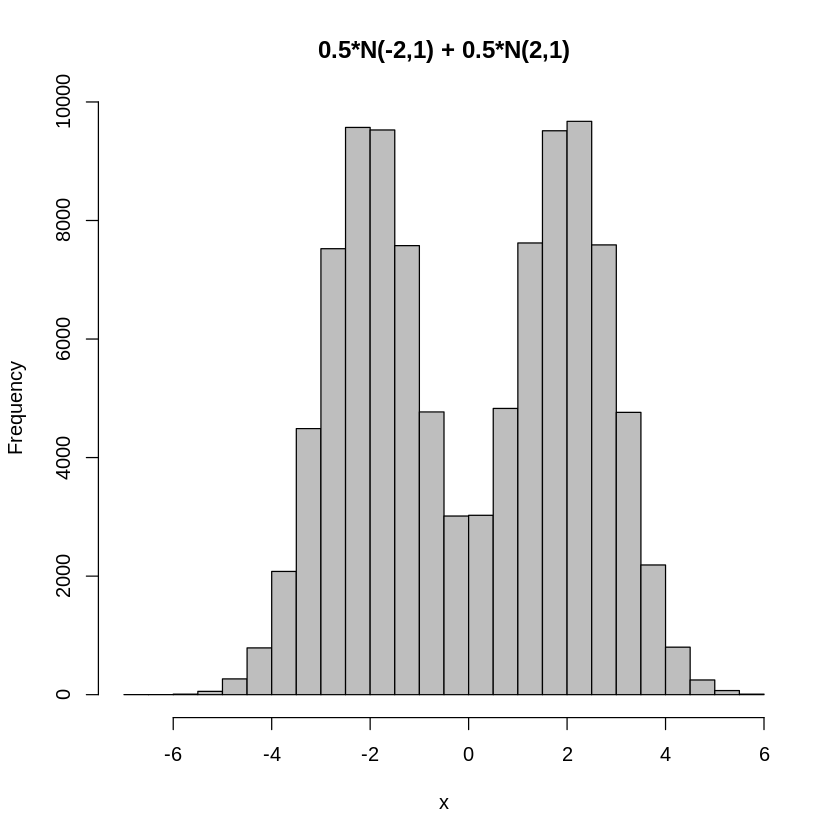

In [ ]:
#產生 N(-2,1) 和 N(2,1) 的混合分配
set.seed(100)
mix = UnivarMixingDistribution(Norm(mean = -2, sd = 1), Norm(mean = 2, sd = 1), mixCoeff = c(0.5, 0.5))
rmix = r(mix)
x = rmix(100000)
hist(x, col = "grey", main = "0.5*N(-2,1) + 0.5*N(2,1)")

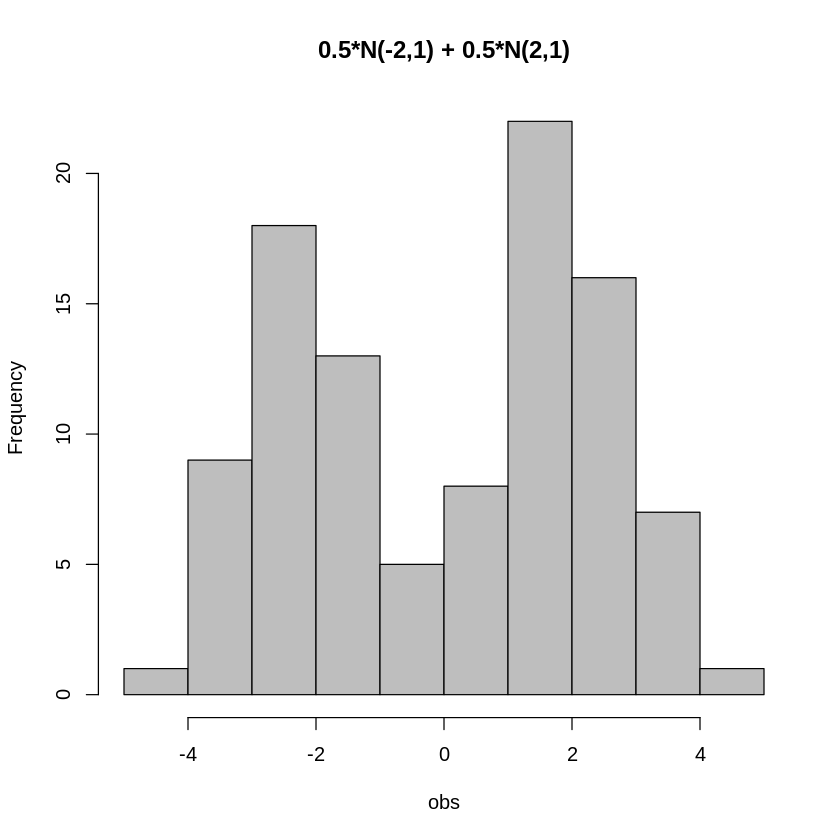

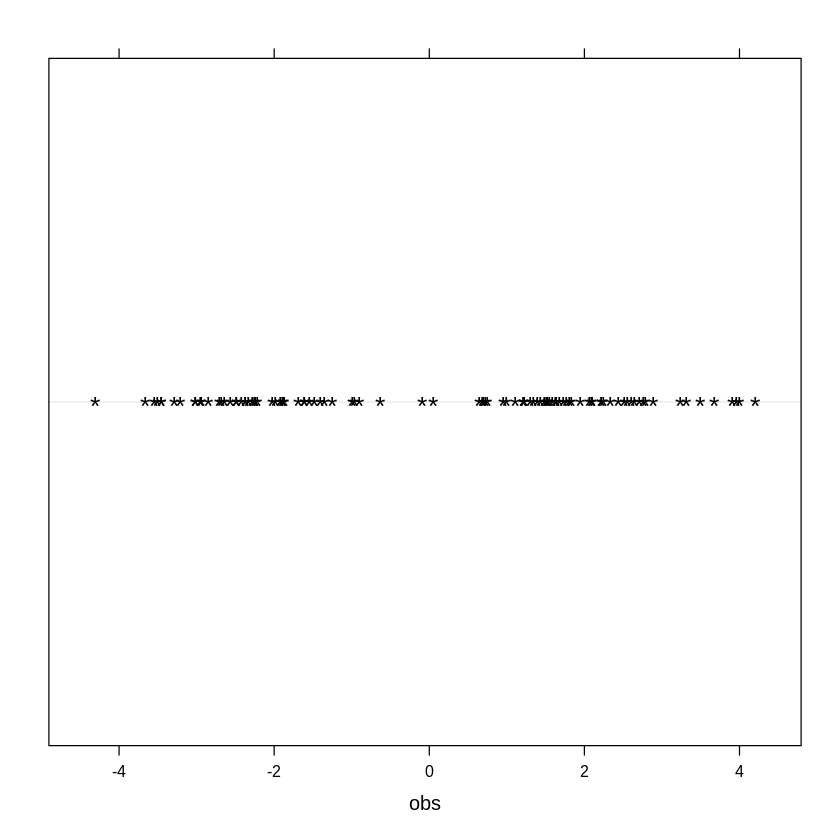

In [ ]:
# 從混合分配中模擬100個觀測值，並利用 histogram 和 dot plot 觀察他們的分佈狀況
set.seed(123)
obs = rmix(100)
hist(obs, breaks = 10, col = "grey", main = "0.5*N(-2,1) + 0.5*N(2,1)")
dotplot(obs, pch = "*", cex = 2, col = "black")

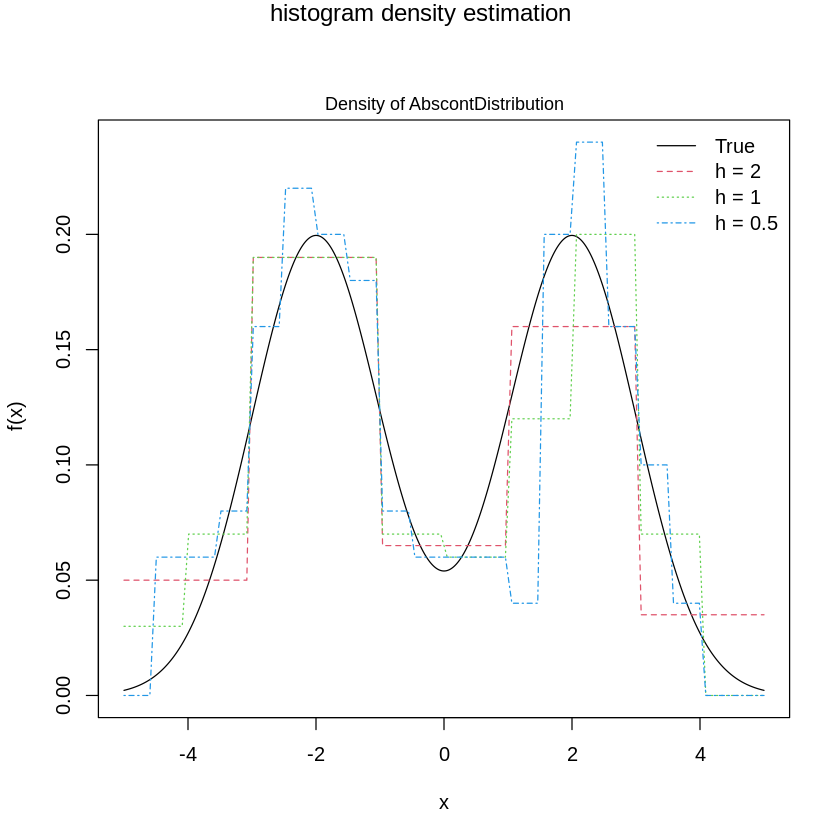

In [ ]:
### histogram density estimation
# 觀察 h (bin的寬度) = 0.5 , 1 , 2 時，所估計出的機率密度函數，
# 由圖可以發現三個估計得都不錯，在x=2和-2都有明顯的雙峰，
# h=0.5 時，整體趨勢會更接近真正的pdf
obs = rmix(100)
n = length(obs)
f = function(x, h){
  a = seq(-5, 5, by = h)
  nj = table(cut(obs, breaks = a))
  j = 1
  while(x > a[j]){
    j = j + 1
  }
  if (x == -5){
    j = 2
  }
  return(as.numeric(nj[j-1]) / (n * h))
}

x = as.array(seq(-5, 5, length.out = 100))
y1 = 0
y2 = 0
y3 = 0
for (i in 1:length(x)){
  y1[i] = f(x[i], h = 2)
  y2[i] = f(x[i], h = 1)
  y3[i] = f(x[i], h = 0.5)
}

plot(mix, to.draw.arg = "d", col = 1, lty = 1, xlab = "x", ylab =" f(x)", ylim = c(0, max(y1, y2, y3)), xlim = c(-5, 5)
     , main = "histogram density estimation")
lines(x, y1, type = "l", col = 2, lty = 2)
lines(x, y2, col = 3, type = "l", lty = 3)
lines(x, y3, col = 4, lty = 4)
legend("topright", legend = c("True", "h = 2", "h = 1", "h = 0.5"),
       col = c(1, 2, 3, 4), lty = c(1, 2, 3, 4), bty = "n")

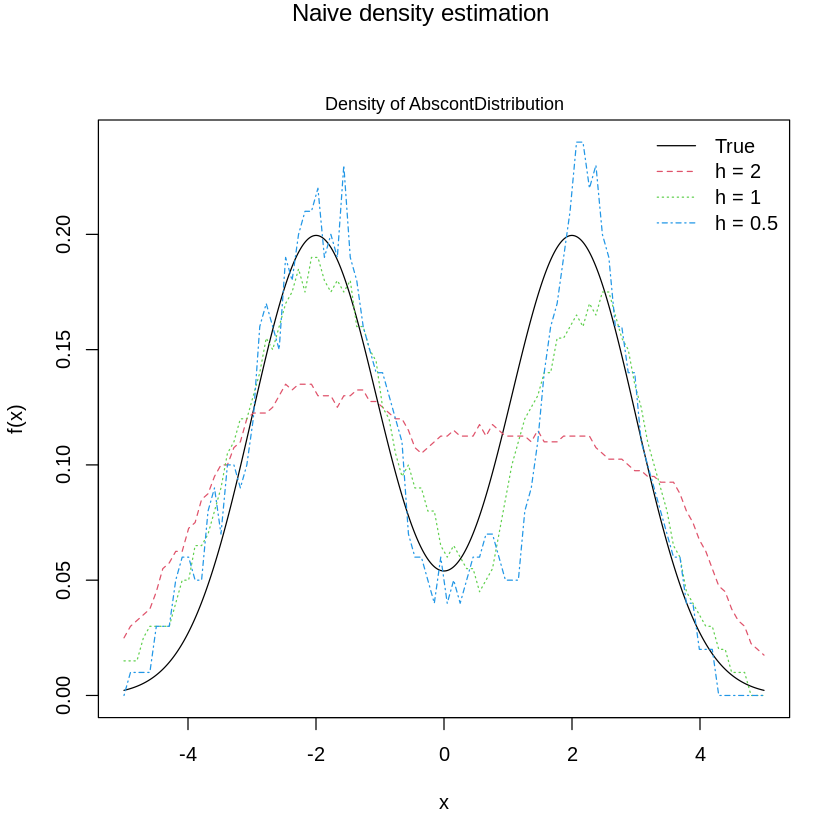

In [ ]:
### Naive 
# 觀察 h (window of width) = 0.5 , 1 , 2 時，所估計出的機率密度函數，
# 由圖可以發現，當h=2時，估計的函數與真實函數相差滿多的，
# 而h=1和2時，整體趨勢都很接近真正的pdf，但還是有明顯的跳動點
n = length(obs)
naive = function(x, h){
  w = sum(abs((x - obs) / h) < 1) * 0.5
  return(w /(n * h))
}

x = as.array(seq(-5, 5, length.out = 100))
y1 = 0
y2 = 0
y3 = 0
for (i in 1:length(x)){
  y1[i] = naive(x[i], h = 2)
  y2[i] = naive(x[i], h = 1)
  y3[i] = naive(x[i], h = 0.5)
}

plot(mix, to.draw.arg="d", col = 1, lty = 1, xlab = "x", ylab = "f(x)", ylim = c(0, max(y1, y2, y3)), xlim = c(-5, 5)
     , main = "Naive density estimation")
lines(x, y1, type = "l", col = 2, lty = 2)
lines(x, y2, col = 3, type = "l", lty = 3)
lines(x, y3, col = 4, lty = 4)
legend("topright", legend = c("True", "h = 2", "h = 1", "h = 0.5"),
       col = c(1, 2, 3, 4), lty = c(1, 2, 3, 4), bty = "n")

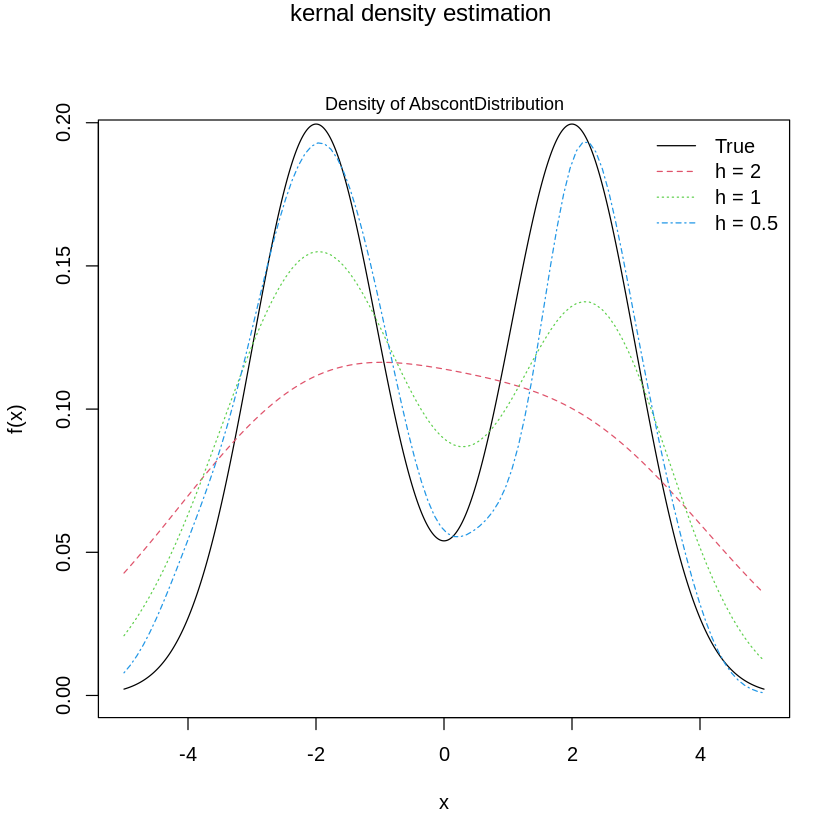

In [ ]:
### kernal
# 觀察 h (bandwidth) = 0.5 , 1 , 2 時，所估計出的機率密度函數，
# 由圖可以發現，和Naiva density estimation一樣當h=2時，估計的函數與真實函數相差滿多的，
# 而h=1和2時，整體趨勢都很接近真正的pdf，且函數更加平滑
n = length(obs)
kernal = function(x, h){
  s = sum(dnorm((x - obs) / h, 0, 1))
  fx = s / (n * h)
  return(fx)
}

x = as.array(seq(-5, 5, length.out = 100))
y1 = 0
y2 = 0
y3 = 0
for (i in 1:length(x)){
  y1[i] = kernal(x[i], h = 2)
  y2[i] = kernal(x[i], h = 1)
  y3[i] = kernal(x[i], h = 0.5)
}

plot(mix, to.draw.arg="d", col = 1, lty = 1, xlab = "x", ylab = "f(x)", ylim = c(0, max(y1, y2, y3)), xlim = c(-5, 5)
     , main = "kernal density estimation")
lines(x, y1, type = "l", col = 2, lty = 2)
lines(x, y2, col = 3, type = "l", lty = 3)
lines(x, y3, col = 4, lty = 4)
legend("topright", legend = c("True", "h = 2", "h = 1", "h = 0.5"),
       col = c(1, 2, 3, 4), lty = c(1, 2, 3, 4), bty = "n")

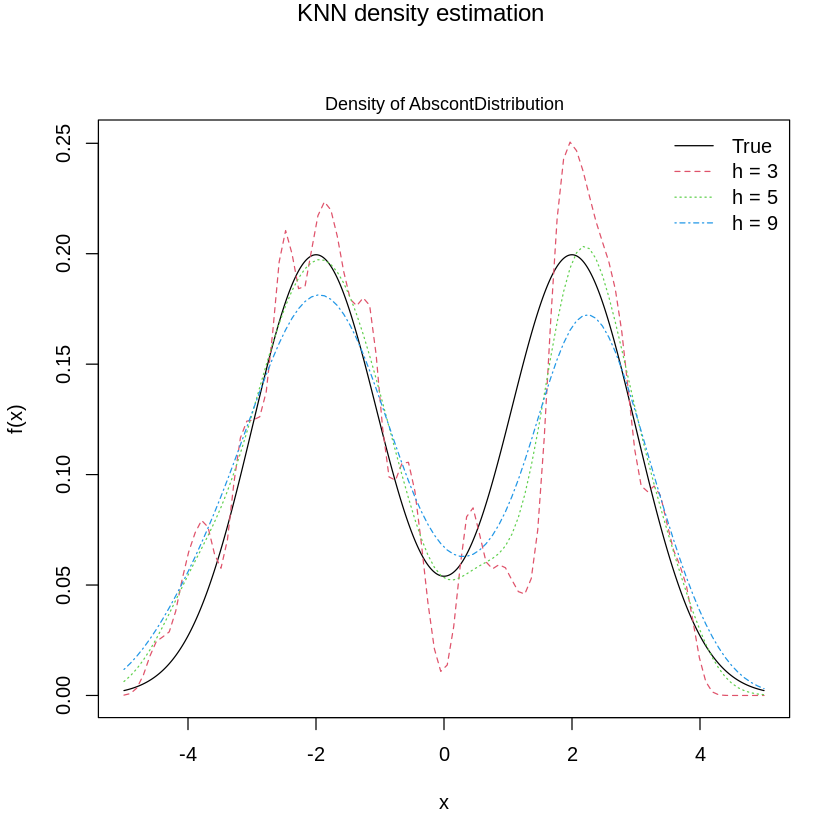

In [ ]:
### KNN
# 觀察 k = 3 , 5 , 9 時，所估計出的機率密度函數，
# 由圖可以發現，三者都估計得不錯，
# 但當k=3時，估計的函數有明顯的跳動點，
# 而k=5和9時，整體趨勢都很接近真正的pdf，且函數更加平滑
n = length(obs)
knn = function(x, k){
  m = c(1, obs)
  d = dist(m)[1:100]
  h = sort(d)[k]
  s = sum(dnorm((x - obs) / h, 0, 1))
  fx = s / (n * h)
  return(fx)
}

x = as.array(seq(-5, 5, length.out = 100))
y1 = 0
y2 = 0
y3 = 0
for (i in 1:length(x)){
  y1[i] = knn(x[i], k = 3)
  y2[i] = knn(x[i], k = 5)
  y3[i] = knn(x[i], k = 9)
}
plot(mix, to.draw.arg = "d", col = 1, lty = 1, xlab = "x", ylab = "f(x)", ylim = c(0, max(y1, y2, y3)), xlim = c(-5, 5)
     , main = "KNN density estimation")
lines(x, y1, type = "l", col = 2, lty = 2)
lines(x, y2, col = 3, type = "l", lty = 3)
lines(x, y3, col = 4, lty = 4)
legend("topright", legend = c("True", "h = 3", "h = 5", "h = 9"),
       col = c(1, 2, 3, 4), lty = c(1, 2, 3, 4), bty = "n")

5.Visit the webpage of Department of Statistics, Ministry of Interior of the Taiwan Government and download the age-specific death records of year 2019. Use the smoothing techniques introduced in class to revise the age-specific mortality rates and compare with the values from 2019 Taiwan abridged life table. (Note: You only need to do the smoothing for the male/female, depending on your gender.)

In [ ]:
install.packages(c("openxlsx", "gss", "splines", "mgcv"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘splines’ is a base package, and should not be updated”


In [ ]:
library(openxlsx)
library(gss)
library(splines)
library(mgcv)

Loading required package: nlme

This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.



In [ ]:
mortality = read.xlsx("hw5.xlsx", rowNames = TRUE)
rate = as.numeric(mortality[1, ] / mortality[2, ])
abridged=as.numeric(mortality[3,1:85])
print(rate)

  [1] 3.657934e-03 2.709782e-04 1.574820e-04 9.854935e-05 1.348059e-04
  [6] 1.156214e-04 6.298485e-05 6.982753e-05 8.286549e-05 1.235178e-04
 [11] 1.175163e-04 1.052288e-04 1.322267e-04 1.114805e-04 2.005093e-04
 [16] 1.443376e-04 1.570236e-04 2.724030e-04 2.921651e-04 3.076755e-04
 [21] 2.814440e-04 2.107564e-04 3.298793e-04 2.463693e-04 3.401841e-04
 [26] 2.724990e-04 2.298630e-04 2.954947e-04 3.900723e-04 3.013750e-04
 [31] 3.755365e-04 4.498480e-04 4.794694e-04 4.965543e-04 5.841294e-04
 [36] 4.525726e-04 6.868096e-04 6.997245e-04 7.696045e-04 7.897708e-04
 [41] 1.000977e-03 8.571205e-04 1.000082e-03 1.013080e-03 1.054213e-03
 [46] 1.365800e-03 1.398633e-03 1.742238e-03 1.787810e-03 1.958617e-03
 [51] 2.083154e-03 2.259252e-03 2.384416e-03 2.544813e-03 2.821193e-03
 [56] 2.726461e-03 3.065482e-03 3.293629e-03 3.868136e-03 3.983012e-03
 [61] 4.234799e-03 4.414935e-03 5.052149e-03 5.506589e-03 6.375657e-03
 [66] 6.496608e-03 6.636535e-03 7.712628e-03 8.074631e-03 9.382648e-03
 [71] 

In [ ]:
print(abridged)

 [1] 3.509251e-03 2.179300e-04 1.631581e-04 1.289309e-04 1.100525e-04
 [6] 1.013268e-04 9.526185e-05 8.621904e-05 8.188139e-05 8.686701e-05
[11] 9.720137e-05 1.117225e-04 1.298635e-04 1.511283e-04 1.744550e-04
[16] 1.980949e-04 2.200737e-04 2.388808e-04 2.539354e-04 2.654747e-04
[21] 2.739190e-04 2.799179e-04 2.827841e-04 2.818530e-04 2.783785e-04
[26] 2.759039e-04 2.782648e-04 2.900905e-04 3.137111e-04 3.474182e-04
[31] 3.869585e-04 4.286968e-04 4.692256e-04 5.076962e-04 5.457096e-04
[36] 5.852708e-04 6.275490e-04 6.723093e-04 7.189576e-04 7.688975e-04
[41] 8.262605e-04 8.955766e-04 9.825782e-04 1.090167e-03 1.215867e-03
[46] 1.353550e-03 1.497227e-03 1.642574e-03 1.789065e-03 1.938524e-03
[51] 2.091971e-03 2.249080e-03 2.407590e-03 2.566519e-03 2.730257e-03
[56] 2.908493e-03 3.108630e-03 3.347606e-03 3.638285e-03 3.977814e-03
[61] 4.323102e-03 4.692648e-03 5.077323e-03 5.485971e-03 5.947317e-03
[66] 6.496096e-03 7.156104e-03 7.950448e-03 8.889736e-03 9.972718e-03
[71] 1.119593e-02 1.

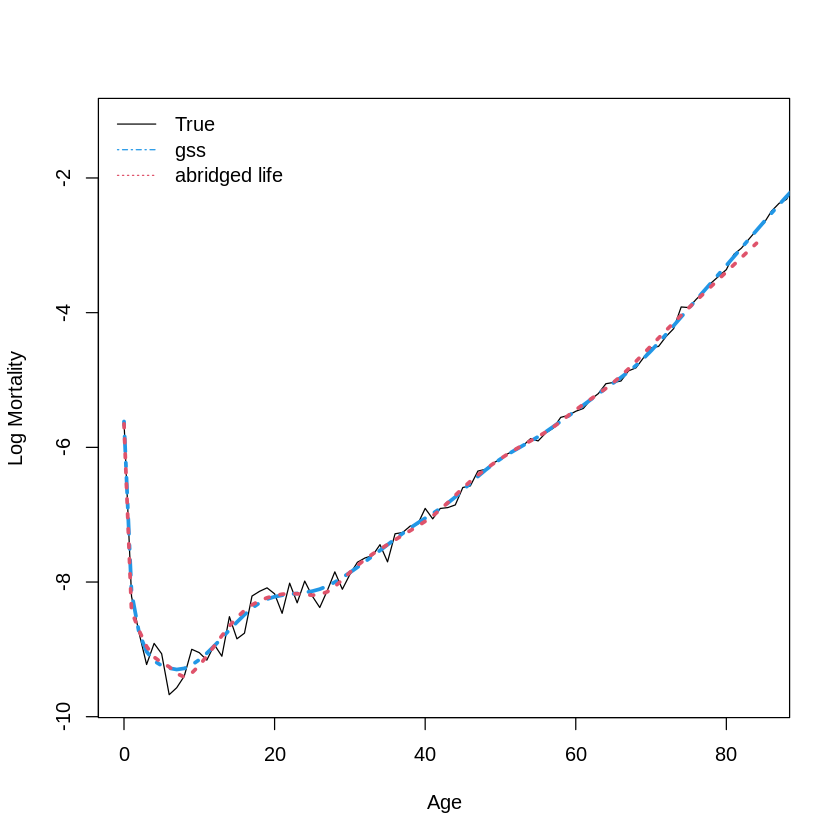

In [ ]:
# smoothing spline ANOVA models
# 由圖可以發現，利用Smoothing Spline ANOVA Models 所fit出來的mortality rate和Taiwan abridged life table的mortality rate非常相似，只有0~10歲有點差距，在10歲之後兩條線幾乎是重合的。
t = sqrt((0:100))
d = as.numeric(mortality[1, ])
e = as.numeric(mortality[2, ])
pois.fit = gssanova((d / e) ~ t, family = "poisson", weights = e)
est = predict(pois.fit, data.frame(t = t), se = TRUE)
plot((0:100), log(d / e), type = "l", xlab = "Age", ylab = "Log Mortality", xlim = c(0, 85), col = 1)
lines((0:100), (est$fit), col = 4, lty = 4, lwd = 3)
lines((0:84), log(abridged), col = 2, lty = 3, lwd = 3)
legend("topleft", legend = c("True", "gss", "abridged life"), col = c(1, 4, 2), lty = c(1, 4, 3), bty = "n")

6.Use “MCMCregress” in the module MCMCpack to obtain MCMC estimation of regression analysis. Duplicate the analysis in the lecture notes and apply the MCMC on the “bikes.csv” data. Compare your results with the regular simple linear regression.

In [ ]:
install.packages(c("devtools", "ggplot2", "HDInterval", "MCMCpack", "mcmc", "mcmcse", "Rcpp", "RcppArmadillo", "stableGR"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘coda’, ‘quantreg’, ‘ellipse’, ‘mvtnorm’




In [ ]:
library(devtools)
library(ggplot2)
library(HDInterval)
library(MCMCpack)
library(mcmc)
library(mcmcse)
library(Rcpp)
library(RcppArmadillo)
library(stableGR)

Loading required package: usethis

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2021 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##

mcmcse: Monte Carlo Standard Errors for MCMC
Version 1.4-1 created on 2020-01-29.
copyright (c) 2012, James M. Flegal, University of California, Riverside
                    John Hughes, University of Colorado, Denver
                    Dootika Vats, University of Warwick
                    Ning Dai, University of Minnesota
 For citation information, type citation("mcmcse").
 Type help("mcmcse-package") to get started.




In [ ]:
bikes = read.csv("bikes.csv")[-1]
y = bikes$riders_registered
x = bikes$temp_feel

In [ ]:
# simple linear regression
lm.fit = lm(y ~ x, data = bikes)
summary(lm.fit)


Call:
lm(formula = y ~ x, data = bikes)

Residuals:
    Min      1Q  Median      3Q     Max 
-3607.1  -959.2  -153.8   998.2  3304.8 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -667.916    251.608  -2.655  0.00811 ** 
x             57.892      3.306  17.514  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1310 on 729 degrees of freedom
Multiple R-squared:  0.2961,	Adjusted R-squared:  0.2952 
F-statistic: 306.7 on 1 and 729 DF,  p-value: < 2.2e-16



Iterations = 20001:50000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 30000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                 Mean        SD  Naive SE Time-series SE
(Intercept) 5.172e-01 3.178e+00 1.835e-02      1.835e-02
x           4.732e+01 6.383e-01 3.685e-03      3.785e-03
sigma2      1.743e+06 9.260e+04 5.346e+02      5.452e+02

2. Quantiles for each variable:

                  2.5%        25%       50%       75%     97.5%
(Intercept) -5.672e+00 -1.652e+00 5.145e-01 2.645e+00 6.789e+00
x            4.606e+01  4.689e+01 4.732e+01 4.776e+01 4.858e+01
sigma2       1.571e+06  1.679e+06 1.740e+06 1.803e+06 1.934e+06


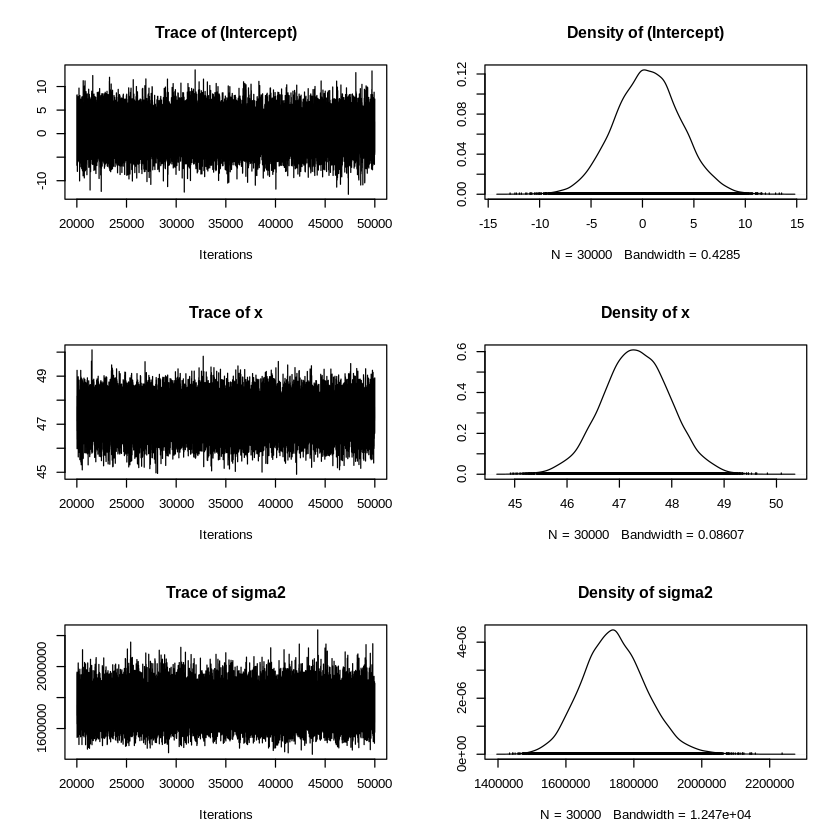

In [ ]:
# MCMCregress
posterior = MCMCregress(y ~ x, b0 = 0, B0 = 0.1, sigma.mu = 5, sigma.var = 25,
mcmc = 30000, burnin = 20000)
plot(posterior)
summary(posterior)

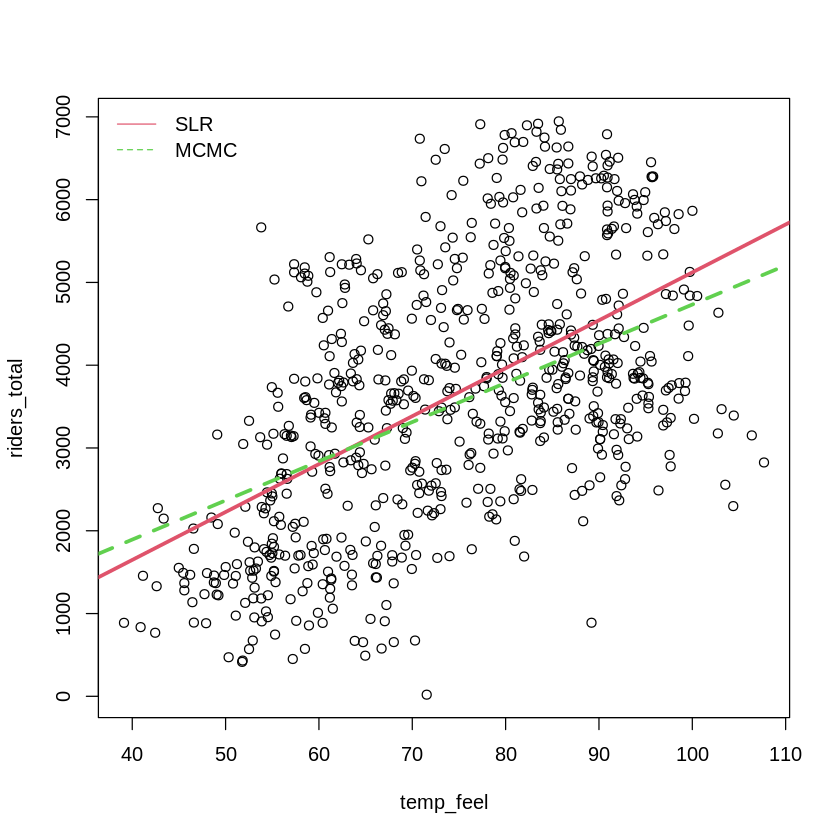

In [ ]:
# plot
plot(x, y, xlab = "temp_feel", ylab = "riders_total")
abline(lm.fit, col = 2, lty = 1, lwd = 3)
abline(0.5172, 47.3224, col = 3, lty = 2, lwd = 3)
legend("topleft", legend = c("SLR", "MCMC"), col = c(2, 3), lty = c(1, 2), bty = "n")